In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import seaborn as sns


pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('..\zoopla_scraper\zoopla_scraper\spiders\zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)

#Converting string data to datetime.date
data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date

data.shape

(2233, 14)

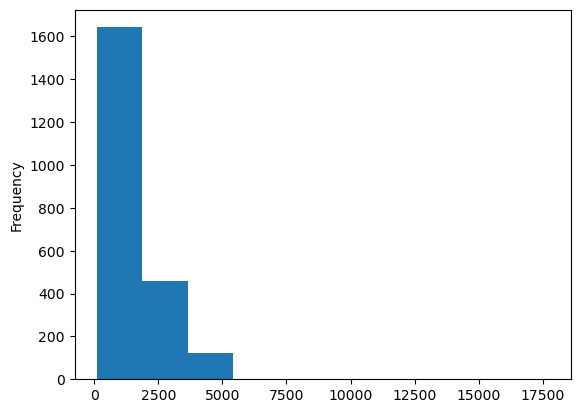

In [ ]:
#First histogram of rent prices
#There are some outliers which price is above 5000 pounds and that affects the shape of the histogram. Let's 
#get rid of them

data['price'].plot(kind='hist')
plt.show()


#Most of the properties have rents below 2500pcm

Text(0.5, 1.0, 'Distribution of rent (properties below 5000 pcm) [pcm]')

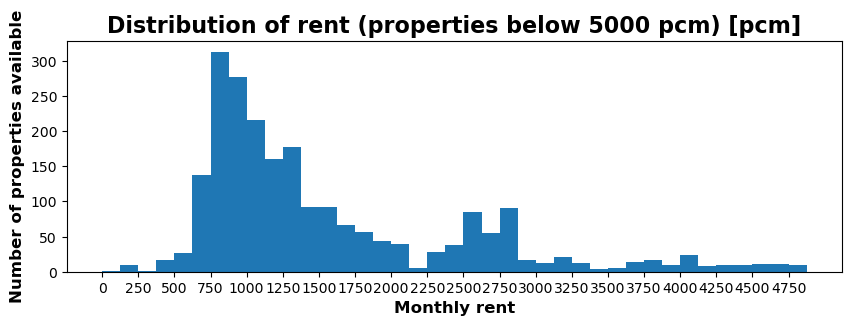

In [ ]:
#There are some outliers which price is above 5000 pounds and that affects the shape 
# of the histogram. Therefore we will analyze properties below 5000 pounds
data=data.query('price<=5000')

#Histogram with rents below 5000pcm. Bi-modal and left skewed distribution 
#Most of the properties on rent have prices in between 500 and 2000 pounds,
#with the peak around 750 and 2750 pounds
#There is a huge offer for properties from above 750pcm

fig,ax=plt.subplots(figsize=(10,3))

data_less_5000=data[data['price']<=5000]

ax.hist(data_less_5000['price'],bins=np.arange(0,5000,125))
ax.set_xticks(np.arange(0,5000,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Distribution of rent (properties below 5000 pcm) [pcm]',
fontsize=16,fontweight='heavy')


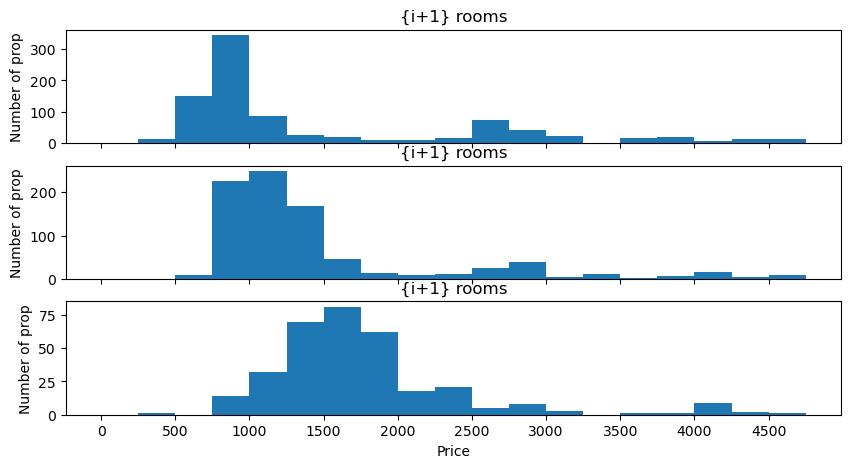

In [17]:
#There is a displacement to the right in the price mode with the increase in number of bedrooms

fig,ax=plt.subplots(3,1,figsize=(10,5),sharex=True)
ax[0].hist(data.query('number_of_beds==1')['price'],bins=range(0,5000,250))
ax[1].hist(data.query('number_of_beds==2')['price'],bins=range(0,5000,250))
ax[2].hist(data.query('number_of_beds==3')['price'],bins=range(0,5000,250))

ax[2].set_xticks(range(0,5000,500))
ax[2].set_xlabel('Price')

for i in range(3):
    ax[i].set_title('{} rooms'.format(i+1))


for i in range (0,3):
    ax[i].set_ylabel('Number of prop')


Text(0, 0.5, 'Number of properties')

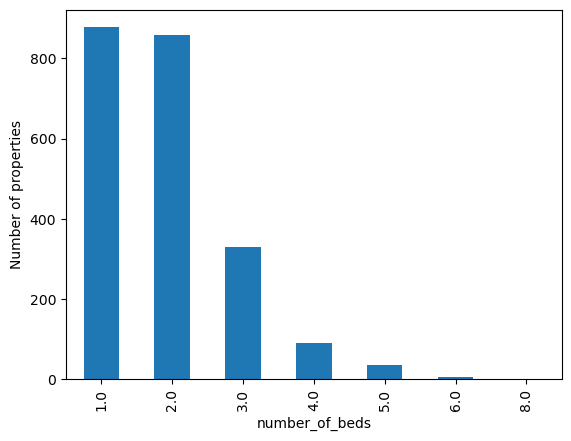

In [8]:
data.groupby('number_of_beds')['price'].count().plot(kind='bar')
plt.xticks(range(0,7))
plt.ylabel('Number of properties')


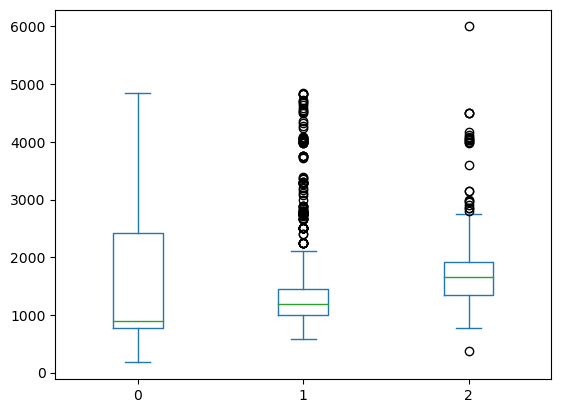

In [16]:
#It can be observed a slight increase of the average property price with the increase in the number of rooms,
#but the dispersion of the data high enough to make this average price meaningless.
bedrooms_1=data.query('number_of_beds==1')['price']
bedrooms_2=data.query('number_of_beds==2')['price']
bedrooms_3=data.query('number_of_beds==3')['price']

bedrooms=pd.concat([bedrooms_1,bedrooms_2,bedrooms_3],axis=1,ignore_index=True)

bedrooms.plot(kind='box')
plt.show()